In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
627770,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7028,19/10/2011 09:30:10 AM,19/10/2011 11:58:50 AM,8920,1P MTR M-SAT 7:30-19:30,1,1346,3829
4137049,City Square,RUSSELL STREET,FLINDERS STREET,FLINDERS LANE,5,635W,28/01/2012 01:32:11 PM,28/01/2012 06:03:54 PM,16303,1/2P MTR M-SAT 7:30-19:30,1,1221,477
1293770,Banks,QUEEN STREET,COLLINS STREET,FLINDERS LANE,1,C1054,06/11/2011 11:42:34 AM,06/11/2011 11:45:27 AM,173,1P SUN 7:30-18:30,0,1171,639
5778742,Southbank,STURT STREET,SOUTHBANK BOULEVARD,MILES STREET,2,8468E,17/03/2012 11:55:41 AM,17/03/2012 12:30:00 PM,2059,2P TKT A SAT 7:30-12:30,0,1323,4727
454368,Queensberry,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10164E,14/10/2011 08:51:22 AM,14/10/2011 09:47:07 AM,3345,1P TKT A M-F 7:30-18:30,0,641,2988


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12167088,City Square,COLLINS STREET,SWANSTON STREET,RUSSELL STREET,3,1950N,28/09/2012 06:15:58 PM,28/09/2012 06:19:06 PM,188,P/(No Parking) M-SUN 0:00 - 23:59,0,528,5361
9713686,Banks,FLINDERS LANE,WILLIAM STREET,QUEEN STREET,4,1839S,17/07/2012 10:51:19 AM,17/07/2012 11:19:08 AM,1669,1/2P MTR M-F 7:30-16:00,0,669,1467
8740288,Southbank,COVENTRY STREET,STURT STREET,DODDS STREET,4,9451S,18/06/2012 02:56:18 PM,18/06/2012 02:57:32 PM,74,1P TKT A M-F 7:30-18:30,0,547,4361
1423360,Courtney,ELIZABETH STREET,QUEENSBERRY STREET,VICTORIA STREET,5,4683W,09/11/2011 05:32:50 PM,09/11/2011 05:40:55 PM,485,1P TKT A M-F 7:30-18:30,0,627,3363
11057249,Titles,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,3,3866N,26/08/2012 05:20:44 PM,26/08/2012 06:30:00 PM,4156,2P SUN 7:30-18:30,0,856,2163


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1064
Princes Theatre     766
The Mac             655
Victoria Market     654
Southbank           644
Regency             621
Hyatt               605
Titles              516
County              451
City Square         424
Rialto              419
Chinatown           419
Hardware            412
Magistrates         382
Spencer             379
Banks               363
Courtney            362
RACV                307
Jolimont            284
Supreme             171
Docklands            60
Tavistock            40
West Melbourne        2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
627770,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7028,19/10/2011 09:30:10 AM,19/10/2011 11:58:50 AM,8920,1P MTR M-SAT 7:30-19:30,1,1346,3829
4137049,CITY SQUARE,RUSSELL STREET,FLINDERS STREET,FLINDERS LANE,5,635W,28/01/2012 01:32:11 PM,28/01/2012 06:03:54 PM,16303,1/2P MTR M-SAT 7:30-19:30,1,1221,477
1293770,BANKS,QUEEN STREET,COLLINS STREET,FLINDERS LANE,1,C1054,06/11/2011 11:42:34 AM,06/11/2011 11:45:27 AM,173,1P SUN 7:30-18:30,0,1171,639
5778742,SOUTHBANK,STURT STREET,SOUTHBANK BOULEVARD,MILES STREET,2,8468E,17/03/2012 11:55:41 AM,17/03/2012 12:30:00 PM,2059,2P TKT A SAT 7:30-12:30,0,1323,4727
454368,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10164E,14/10/2011 08:51:22 AM,14/10/2011 09:47:07 AM,3345,1P TKT A M-F 7:30-18:30,0,641,2988


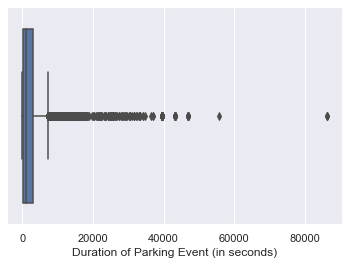

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             955
QUEEN STREET                728
EXHIBITION STREET           591
FRANKLIN STREET             581
LA TROBE STREET             538
RUSSELL STREET              514
ELIZABETH STREET            510
COLLINS STREET              492
BOURKE STREET               449
LT LONSDALE STREET          314
SPRING STREET               290
FLINDERS LANE               269
LT COLLINS STREET           268
KING STREET                 255
ERROL STREET                238
WILLIAM STREET              204
LT BOURKE STREET            186
A'BECKETT STREET            170
COVENTRY STREET             146
VICTORIA STREET             140
SPENCER STREET              140
QUEENSBERRY STREET          130
FLINDERS STREET             130
CAPEL STREET                105
DORCAS STREET                97
GRANT STREET                 96
THERRY STREET                94
ALBERT STREET                87
LEVESON STREET               77
KAVANAGH STREET              71
COBDEN STREET                71
O'CONNEL

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            911
QUEEN STREET           796
QUEENSBERRY STREET     658
WILLIAM STREET         583
RUSSELL STREET         557
SPENCER STREET         505
LT LONSDALE STREET     465
SWANSTON STREET        460
EXHIBITION STREET      431
LT COLLINS STREET      384
LONSDALE STREET        358
COLLINS STREET         294
VICTORIA STREET        286
BOURKE STREET          284
ELIZABETH STREET       280
LT BOURKE STREET       278
FLINDERS LANE          194
LA TROBE STREET        176
WILLAM STREET          154
FRANKLIN STREET        130
A'BECKETT STREET       128
THERRY STREET          110
SOUTHBANK BOULEVARD    109
WELLS STREET           108
ERROL STREET           106
DODDS STREET           101
FLINDERS STREET         97
KINGS WAY               94
STURT STREET            88
O'CONNELL STREET        86
HOWARD STREET           58
PELHAM STREET           54
ALBERT STREET           54
BALSTON STREET          53
VICTORIA PARADE         53
GISBORNE STREET         52
COBDEN STREET           44
N

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        867
VICTORIA STREET       837
ELIZABETH STREET      822
QUEEN STREET          723
EXHIBITION STREET     547
KING STREET           505
LONSDALE STREET       487
SPRING STREET         429
FLINDERS LANE         391
COLLINS STREET        384
RUSSELL STREET        366
LT BOURKE STREET      358
LT COLLINS STREET     284
SWANSTON STREET       280
BOURKE STREET         278
LA TROBE STREET       240
LT LONSDALE STREET    207
FLINDERS STREET       194
DODDS STREET          156
FRANKLIN STREET       110
ST KILDA ROAD         108
LEVESON STREET        106
A'BECKETT STREET       82
LANSDOWNE STREET       81
QUEENSBERRY STREET     78
POWER STREET           75
WELLS STREET           72
WALSH STREET           60
STURT STREET           54
CAPEL STREET           51
THERRY STREET          50
HAWKE STREET           47
MILES STREET           45
ELM STREET             42
DUDLEY STREET          40
GRANT STREET           38
GISBORNE STREET        37
CATHEDRAL PLACE        37
KAVANAGH STR

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
627770,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7028,2011-10-19 09:30:10,2011-10-19 11:58:50,8920,1P MTR M-SAT 7:30-19:30,1,1346,3829
4137049,CITY SQUARE,RUSSELL STREET,FLINDERS STREET,FLINDERS LANE,5,635W,2012-01-28 13:32:11,2012-01-28 18:03:54,16303,1/2P MTR M-SAT 7:30-19:30,1,1221,477
1293770,BANKS,QUEEN STREET,COLLINS STREET,FLINDERS LANE,1,C1054,2011-06-11 11:42:34,2011-06-11 11:45:27,173,1P SUN 7:30-18:30,0,1171,639
5778742,SOUTHBANK,STURT STREET,SOUTHBANK BOULEVARD,MILES STREET,2,8468E,2012-03-17 11:55:41,2012-03-17 12:30:00,2059,2P TKT A SAT 7:30-12:30,0,1323,4727
454368,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10164E,2011-10-14 08:51:22,2011-10-14 09:47:07,3345,1P TKT A M-F 7:30-18:30,0,641,2988


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12167088,CITY SQUARE,COLLINS STREET,SWANSTON STREET,RUSSELL STREET,3,1950N,2012-09-28 18:15:58,2012-09-28 18:19:06,188,P/(NO PARKING) M-SUN 0:00 - 23:59,0,528,5361
9713686,BANKS,FLINDERS LANE,WILLIAM STREET,QUEEN STREET,4,1839S,2012-07-17 10:51:19,2012-07-17 11:19:08,1669,1/2P MTR M-F 7:30-16:00,0,669,1467
8740288,SOUTHBANK,COVENTRY STREET,STURT STREET,DODDS STREET,4,9451S,2012-06-18 14:56:18,2012-06-18 14:57:32,74,1P TKT A M-F 7:30-18:30,0,547,4361
1423360,COURTNEY,ELIZABETH STREET,QUEENSBERRY STREET,VICTORIA STREET,5,4683W,2011-09-11 17:32:50,2011-09-11 17:40:55,485,1P TKT A M-F 7:30-18:30,0,627,3363
11057249,TITLES,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,3,3866N,2012-08-26 17:20:44,2012-08-26 18:30:00,4156,2P SUN 7:30-18:30,0,856,2163


### KNN Classification Model on Predicitive Analytics question 1

In [19]:
#Target field identification
target = parkingdata['In Violation?']
target.head(10)

627770      1
4137049     1
1293770     0
5778742     0
454368      0
11411372    0
3417167     0
7808343     0
954738      0
645029      0
Name: In Violation?, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('In Violation?', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
627770,0,0,0,0,0,1,8920,1346,3829,9,11
4137049,1,1,1,1,1,5,16303,1221,477,13,18
1293770,2,2,2,1,2,1,173,1171,639,11,11
5778742,3,3,3,2,3,2,2059,1323,4727,11,12
454368,4,4,4,3,4,2,3345,641,2988,8,9
11411372,5,5,5,4,5,5,2353,627,7346,12,13
3417167,6,2,6,5,0,1,944,1171,748,17,17
7808343,7,6,7,6,6,3,78,528,1283,12,12
954738,6,2,6,5,0,1,1069,1171,758,14,14
645029,8,7,8,7,7,3,372,926,1730,14,14


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 75.3min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 101.5min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a = bestModel.best_estimator_.get_params()['algorithm']
best_l = bestModel.best_estimator_.get_params()['leaf_size']
best_p = bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 9
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9129
1,auto,10,1,1,distance,0.9129
2,auto,10,1,2,uniform,0.9049
3,auto,10,1,2,distance,0.9049
4,auto,10,1,5,uniform,0.9033
5,auto,10,1,5,distance,0.9033
6,auto,10,2,1,uniform,0.9183
7,auto,10,2,1,distance,0.9132
8,auto,10,2,2,uniform,0.9144
9,auto,10,2,2,distance,0.9049


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.862
Score with 2 selected features: 0.869
Score with 3 selected features: 0.904
Score with 4 selected features: 0.9045
Score with 5 selected features: 0.917
Score with 6 selected features: 0.9215
Score with 7 selected features: 0.9235
Score with 8 selected features: 0.924

Indexs of the desired features
[2, 3, 6, 0, 7, 10, 8, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Duration of Parking Event (in seconds),Area Name,Street ID,Departure Hour,Device ID,Side Of Street
627770,0,0,8920,0,1346,11,3829,1
4137049,1,1,16303,1,1221,18,477,5
1293770,2,1,173,2,1171,11,639,1
5778742,3,2,2059,3,1323,12,4727,2
454368,4,3,3345,4,641,9,2988,2
11411372,5,4,2353,5,627,13,7346,5
3417167,6,5,944,6,1171,17,748,1
7808343,7,6,78,7,528,12,1283,3
954738,6,5,1069,6,1171,14,758,1
645029,8,7,372,8,926,14,1730,3


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 53.4min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 9
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9043
1,auto,10,1,1,distance,0.9043
2,auto,10,1,2,uniform,0.8983
3,auto,10,1,2,distance,0.8983
4,auto,10,1,5,uniform,0.8956
5,auto,10,1,5,distance,0.8956
6,auto,10,2,1,uniform,0.9149
7,auto,10,2,1,distance,0.9046
8,auto,10,2,2,uniform,0.9130
9,auto,10,2,2,distance,0.8984


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[4144  135]
 [ 278  443]]

[Train/test split] score: 0.91740



 Accuracy score: 0.91740

 Misclassification Rate: 0.08260

 True Positive Rate: 0.61442

 True Negative Rate: 0.96845

 Precision : 0.76644

 Prevalence : 0.14420

 F score : 0.68206

 False Positive Rate: 0.03155


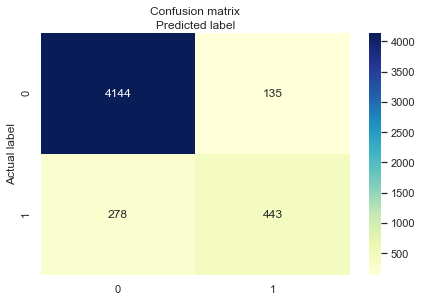

In [36]:
#Name of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

#Printing the numerical result of the confusion matrix
print("\n Accuracy score: {:.5f}".format(knn.score(x_test, y_test)))
misclassification_error = (FP + FN) / float(TP + TN + FP + FN)
print("\n Misclassification Rate: {:.5f}".format(misclassification_error))
sensitivity = TP / float(FN + TP)
print("\n True Positive Rate: {:.5f}".format(sensitivity))
specificity = TN / (TN + FP)
print("\n True Negative Rate: {:.5f}".format(specificity))
precision = TP / float(TP + FP)
print("\n Precision : {:.5f}".format(precision))
prevalence =  float(FN + TP)/float(TP + TN + FP + FN)
print("\n Prevalence : {:.5f}".format(prevalence))
fscore = (2 * precision * sensitivity) / (precision + sensitivity)
print("\n F score : {:.5f}".format(fscore))
print("\n False Positive Rate: {:.5f}".format(1-specificity))

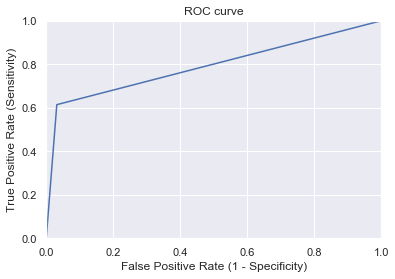

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.92650
[fold 1] score: 0.91600
[fold 2] score: 0.93050
[fold 3] score: 0.91700
[fold 4] score: 0.93300

KNN mean score [5 folds] = 0.9246
